In [148]:
import sys
!{sys.executable} -m pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [8]:
import plotly.graph_objects as go
import numpy as np
from scipy.signal import butter,filtfilt
import time
start_time = time.time()

# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

# sin wave
t=time 
#sig = np.sin(1.2*2*np.pi*t)
# Lets add some noise
#noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = G2Z-offset[3,2]
#sig + noise

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

start_time = time.time()
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
print("My program took", time.time() - start_time, "to run")

fig = go.Figure()
"""
fig.add_trace(go.Scatter(
            y = G2Z-offset[3,2],
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
"""
fig.add_trace(go.Scatter(
            y = data3D[:,3,2],
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
"""
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
"""
fig.show()


My program took 0.0020105838775634766 to run


[ 0.00000000e+00  1.74009185e-04  2.05601834e-03 ... -7.14018828e-04
 -8.45009405e-04 -5.69336245e-15]
[ 0.00000000e+00 -1.08222765e-03 -4.29937447e-03 ...  2.59134377e-03
  1.02119249e-03  1.72084569e-13]
[ 0.00000000e+00 -1.14086608e-03  5.24268244e-04 ...  4.51731737e-04
  1.26286562e-03  6.05765438e-15]
[ 0.00000000e+00  1.62625217e-01  1.06500434e-01 ... -1.94000410e-01
 -1.53875255e-01  5.66213743e-13]
[ 0.00000000e+00  4.15839665e-02 -1.79332055e-01 ...  1.70581974e-01
  8.96659977e-02  2.41473508e-13]
[ 0.00000000e+00 -2.82912134e-02 -4.78324054e-02 ... -4.66757436e-03
 -3.29587878e-02  2.98372438e-13]
[0.00000000e+00 1.07033172e-03 4.27566457e-03 ... 3.65433481e-03
 1.55266753e-03 7.20951077e-15]
[ 0.00000000e+00 -3.83303245e-04  1.48444017e-04 ...  4.00633971e-04
  8.71346076e-04  1.99174011e-13]
[ 0.00000000e+00  4.41984130e-04  3.50697124e-03 ... -5.17969664e-04
 -4.41984130e-04 -5.37070388e-15]
[ 0.00000000e+00  2.34045517e-02 -2.06940982e-01 ...  1.54440973e-01
  9.034542

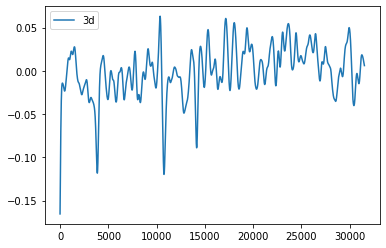

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May 10 18:27:46 2020

@author: xnibereik
"""
import matplotlib.pyplot as plt
import csv
import numpy as np
import time
from scipy.signal import butter,filtfilt

# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 0.5      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

def running_average(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    print(cumsum)
    return (cumsum[N:] - cumsum[:-N]) / float(N)  

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

tim = []
data = []
no_sensors = 2
with open(r"readings.txt") as csv_file:
    csv_reader = csv.reader(csv_file, skipinitialspace=True)
    line_count = 0

    for row in csv_reader:
        if line_count == 0:
            pass
        else:
            row[0] = row[0].replace('(','')
            row[no_sensors*6] = row[no_sensors*6].replace(')','')
            row = [float(i) for i in row]
            tim.append(row[0])
            data.append(row[1:])
        line_count += 1
csv_file.close()
data3D = np.reshape(data,(-1,no_sensors*2,3))

#accel1 reference
A1 = data3D[:,0,:]
A1X = data3D[:,0,0]
A1Y = data3D[:,0,1]
A1Z = data3D[:,0,2]

#accel2 reference
A2 = data3D[:,2,:]
A2X = data3D[:,2,0]
A2Y = data3D[:,2,1]
A2Z = data3D[:,2,2]

#gyro1 reference
G1 = data3D[:,1,:]
G1X = np.copy(data3D[:,1,0])
G1Y = data3D[:,1,1]
G1Z = data3D[:,1,2]

#gyro2 reference
G2 = data3D[:,3,:]
G2X = data3D[:,3,0]
G2Y = data3D[:,3,1]
G2Z = np.copy(data3D[:,3,2])

#time reference
tim = np.subtract(tim,tim[0])
dim = np.shape(data3D)
offset = np.zeros((dim[1],dim[2]))
a_coeff = np.zeros(int(dim[1]/2))

start_time = time.time()
#offsets & accelerometer scaling coefficients
for sensor in range(0,dim[1]):
    for axis in range(0,dim[2]):
        offset[sensor,axis] = np.mean(data3D[:,sensor,axis])
        data3D[:,sensor,axis] -= offset[sensor,axis]
        if sensor%2 == 0:
            a_coeff[int(sensor/2)] = np.sqrt(np.sum(offset[sensor,:]**2))
        data3D[:,sensor,axis] = np.concatenate((data3D[0:9,sensor,axis],running_average(data3D[:,sensor,axis],10)))
        data3D[:,sensor,axis] = butter_lowpass_filter(data3D[:,sensor,axis], cutoff, fs, order)
        if sensor%2 == 0:                
            data3D[:,sensor,axis] /= a_coeff[int(sensor/2)]

            

print("My program took", time.time() - start_time, "to run")

#print(a_coeff)

######sample of how to get a scaled acceleration########
#A1[:,0] = A1[:,0]/a_coeff[0]
#A1[:,1] = A1[:,1]/a_coeff[0]
#A1[:,2] = A1[:,2]/a_coeff[0]
######sample of how to get gyro and accel readings without offsets########
#G1[:,0] = G1[:,0]-offset[1,0]
#G1[:,1] = G1[:,1]-offset[1,1]
#G1[:,2] = G1[:,2]-offset[1,2]


#plt.plot(tim,data3D[:,1,0],label='3d')
#print(mean)
#plt.plot(time,A1X)
#plt.plot(time,A1Y)
#plt.plot(time,A1Z)
#plt.plot(time,A2X)
#plt.plot(time,A2Y)
#plt.plot(time,A2Z)
#plt.plot(tim,G1X1,'--',label='1d')
#plt.plot(time[0:len(G1X)],G1X-offset[1,0])
#plt.plot(time,G1Y-mean[1,1])
#plt.plot(time,G1Z-mean[1,2])
#plt.plot(time,G2X)
#plt.plot(time,G2Y)
#plt.plot(tim,G2Z-offset[3,2],'--',label='orig')
plt.plot(tim,data3D[:,3,2],label='3d')
plt.legend()
